In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
netflix = pd.read_csv("NetflixData.csv")
netflix.head(5)

,Show Id,Title,Description,Director,Genres,Cast,Production Country,Release Date,Rating,Duration,Imdb Score,Content Type,Date Added
0,cc1b6ed9-cf9e-4057-8303-34577fb54477,(Un)Well,This docuseries takes a deep dive into the luc...,NaN,Reality TV,NaN,United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
1,e2ef4e91-fb25-42ab-b485-be8e3b23dedb,#Alive,"As a grisly virus rampages a city, a lone man ...",Cho Il,"Horror Movies, International Movies, Thrillers","Yoo Ah-in, Park Shin-hye",South Korea,2020.0,TV-MA,99 min,6.2/10,Movie,"September 8, 2020"
2,b01b73b7-81f6-47a7-86d8-acb63080d525,#AnneFrank - Parallel Stories,"Through her diary, Anne Frank's story is retol...","Sabina Fedeli, Anna Migotto","Documentaries, International Movies","Helen Mirren, Gengher Gatti",Italy,2019.0,TV-14,95 min,6.4/10,Movie,"July 1, 2020"
3,b6611af0-f53c-4a08-9ffa-9716dc57eb9c,#blackAF,Kenya Barris and his family navigate relations...,NaN,TV Comedies,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,2020.0,TV-MA,1 Season,6.6/10,TV Show,NaN
4,7f2d4170-bab8-4d75-adc2-197f7124c070,#cats_the_mewvie,This pawesome documentary explores how our fel...,Michael Margolis,"Documentaries, International Movies",NaN,Canada,2020.0,TV-14,90 min,5.1/10,Movie,"February 5, 2020"


In [8]:
netflix.shape

(5967, 13)

In [9]:
netflix.columns

Index(['Show Id', 'Title', 'Description', 'Director', 'Genres', 'Cast',
       'Production Country', 'Release Date', 'Rating', 'Duration',
       'Imdb Score', 'Content Type', 'Date Added'],
      dtype='object')

In [11]:
netflix.rename(columns = {'Show Id':'show_id', 'Title':'title', 'Description':'description', 
                          'Director':'director', 'Genres':'genres', 'Cast':'cast', 
                          'Production Country':'production_country', 'Release Date':'release_date', 
                          'Rating':'rating', 'Duration':'duration', 'Imdb Score':'imdb_score', 
                          'Content Type':'content_type', 'Date Added':'date_added'}, inplace = True)

In [12]:
netflix.columns

Index(['show_id', 'title', 'description', 'director', 'genres', 'cast',
       'production_country', 'release_date', 'rating', 'duration',
       'imdb_score', 'content_type', 'date_added'],
      dtype='object')

In [13]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5967 entries, 0 to 5966
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   show_id             5967 non-null   object 
 1   title               5967 non-null   object 
 2   description         5967 non-null   object 
 3   director            3903 non-null   object 
 4   genres              5967 non-null   object 
 5   cast                5437 non-null   object 
 6   production_country  5408 non-null   object 
 7   release_date        5964 non-null   float64
 8   rating              5963 non-null   object 
 9   duration            5964 non-null   object 
 10  imdb_score          5359 non-null   object 
 11  content_type        5967 non-null   object 
 12  date_added          4632 non-null   object 
dtypes: float64(1), object(12)
memory usage: 606.1+ KB


In [14]:
netflix.isnull().sum()

show_id                  0
title                    0
description              0
director              2064
genres                   0
cast                   530
production_country     559
release_date             3
rating                   4
duration                 3
imdb_score             608
content_type             0
date_added            1335
dtype: int64

In [15]:
netflix.cast.fillna("cast unavailable", inplace=True)
netflix.production_country.fillna("production country unavailable", inplace=True)
netflix.director.fillna("director unavailable", inplace=True)

In [16]:
netflix.dropna(subset=["release_date", "rating", "duration", "imdb_score"], inplace=True)
netflix.drop(["date_added"], axis=1, inplace=True)

In [17]:
netflix['imdb_score'] = netflix['imdb_score'].str.replace('/10', '')
netflix['imdb_score'] = netflix['imdb_score'].apply(pd.to_numeric)
netflix = netflix.rename(columns={'release_date':'release_year'})
netflix['release_year'] = netflix['release_year'].astype(int)

In [18]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5359 entries, 0 to 5966
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   show_id             5359 non-null   object 
 1   title               5359 non-null   object 
 2   description         5359 non-null   object 
 3   director            5359 non-null   object 
 4   genres              5359 non-null   object 
 5   cast                5359 non-null   object 
 6   production_country  5359 non-null   object 
 7   release_year        5359 non-null   int32  
 8   rating              5359 non-null   object 
 9   duration            5359 non-null   object 
 10  imdb_score          5359 non-null   float64
 11  content_type        5359 non-null   object 
dtypes: float64(1), int32(1), object(10)
memory usage: 523.3+ KB


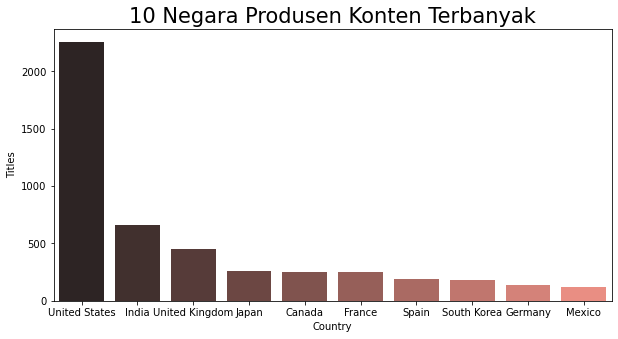

In [25]:
Countries = netflix.set_index('title').production_country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
Countries = Countries[Countries != 'production country unavailable']
plt.figure(figsize=(10,5))
g = sns.countplot(x = Countries, order=Countries.value_counts().index[:10], palette='dark:salmon')
plt.title('10 Negara Produsen Konten Terbanyak', fontsize=21)
plt.xlabel('Country')
plt.ylabel('Titles')
plt.show()

In [27]:
countries = netflix.set_index('title').production_country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
countries = countries[countries != 'production country unavailable']

iplot([go.Choropleth(
    locationmode='country names',
    locations=countries,
    z=countries.value_counts()
)])

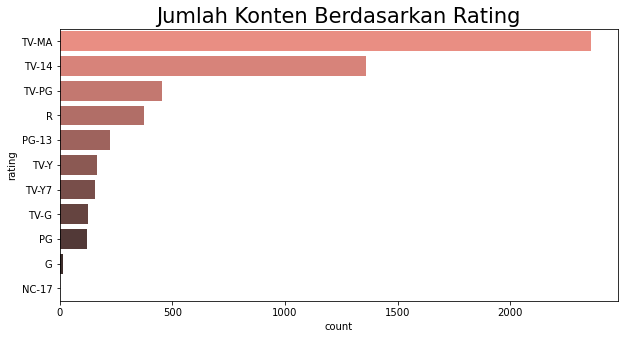

In [30]:
plt.figure(figsize=(10, 5))
sns.countplot(y='rating', data=netflix, order=netflix.rating.value_counts().index.to_list(), 
              palette='dark:salmon_r')
plt.title('Jumlah Konten Berdasarkan Rating', fontsize=21);

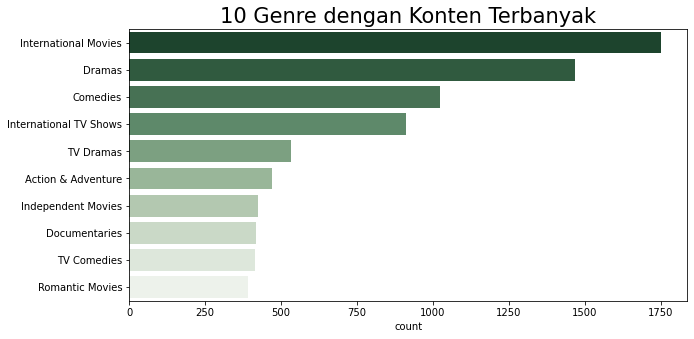

In [33]:
top_genres = netflix.set_index('title').genres.str.split(', ', 
              expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(10, 5))
sns.countplot(y=top_genres, order=top_genres.value_counts().index.to_list()[:10], 
              palette='Greens_r', saturation=.4)
plt.title('10 Genre dengan Konten Terbanyak', fontsize=21);

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



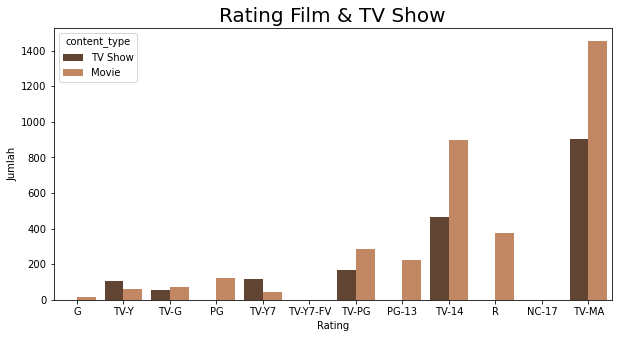

In [36]:
order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(10,5))
g = sns.countplot(netflix.rating, hue=netflix.content_type, order=order, palette="copper");
plt.title("Rating Film & TV Show", fontsize=20)
plt.xlabel("Rating")
plt.ylabel("Jumlah")
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



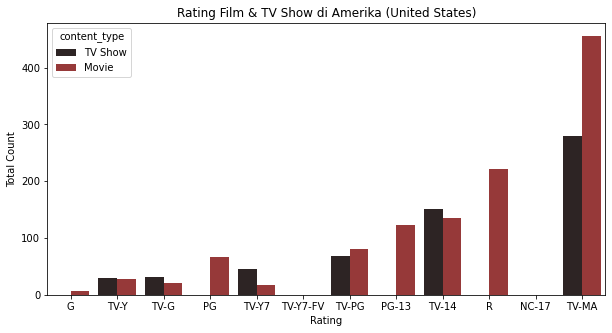

In [38]:
US = netflix[netflix.production_country == "United States"]
order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 
          'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(10,5))
g = sns.countplot(US.rating, hue=US.content_type, order=order, palette="dark:brown");
plt.title("Rating Film & TV Show di Amerika (United States)")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



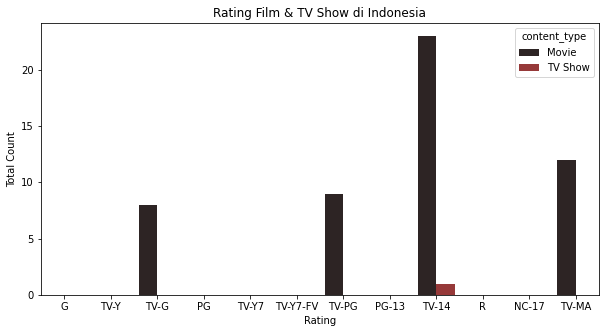

In [39]:
IDN = netflix[netflix.production_country == "Indonesia"]
order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 
          'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(10,5))
g = sns.countplot(IDN.rating, hue=IDN .content_type, order=order, palette="dark:brown");
plt.title("Rating Film & TV Show di Indonesia")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

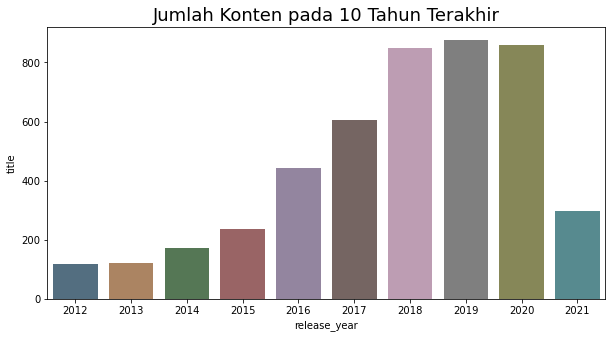

In [41]:
plt.figure(figsize=(10,5))
netflix_year = netflix['release_year'].value_counts()
netflix_year = pd.DataFrame(netflix_year).reset_index()
netflix_year.columns = ['release_year','title']
sns.barplot(x = 'release_year',y = 'title', data=netflix_year.head(10), saturation=.3)
plt.title('Jumlah Konten pada 10 Tahun Terakhir', fontsize=18);

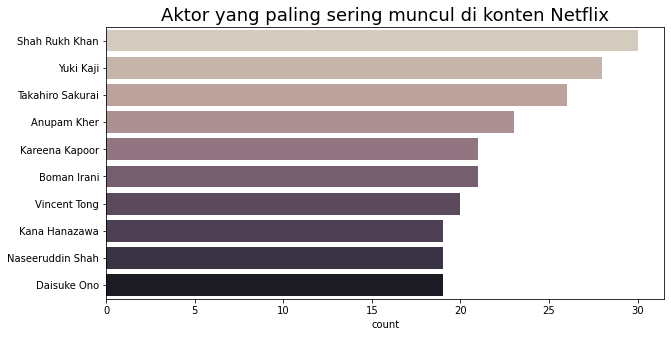

In [45]:
plt.figure(figsize=(10,5))
netflix_cast = netflix[netflix.cast != 'cast unavailable'].set_index('title').cast.str.split(', '
               , expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = netflix_cast, order=netflix_cast.value_counts().index[:10], 
              palette='magma_r', saturation=.2)
plt.title('Aktor yang paling sering muncul di konten Netflix', fontsize=18);
plt.show()

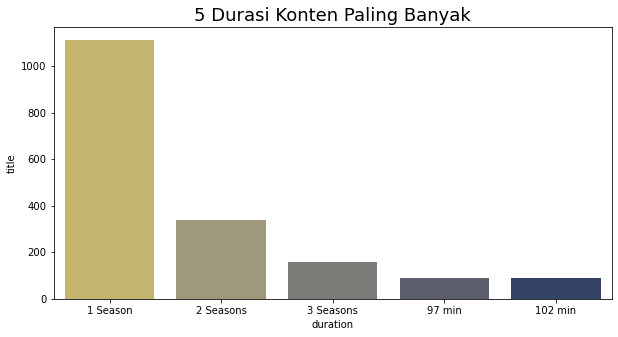

In [47]:
plt.figure(figsize=(10,5))
netflix_duration = netflix['duration'].value_counts()
netflix_duration = pd.DataFrame(netflix_duration).reset_index()
netflix_duration.columns = ['duration','title']
sns.barplot(x = 'duration',y = 'title', data=netflix_duration.head(5), 
            palette="cividis_r")
plt.title('5 Durasi Konten Paling Banyak', fontsize=18);

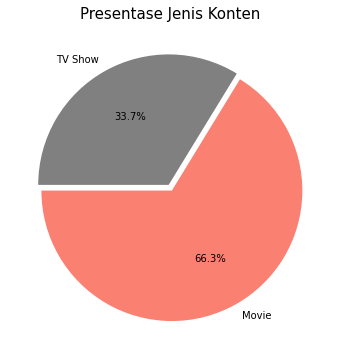

In [51]:
plt.figure(figsize=(10,6))
plt.title("Presentase Jenis Konten", fontsize=15)
g = plt.pie(netflix.content_type.value_counts(),explode=(0.025,0.025), 
            labels=netflix.content_type.value_counts().index, 
            colors=['salmon','grey'], autopct='%1.1f%%', startangle=180)
plt.show()

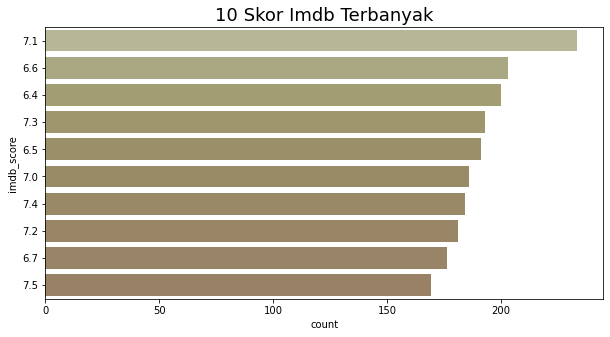

In [53]:
plt.figure(figsize=(10, 5))
sns.countplot(y='imdb_score', data=netflix, order=netflix.imdb_score.value_counts().index[:10], 
              palette='Wistia', saturation=.2)
plt.title('10 Skor Imdb Terbanyak', fontsize=18);

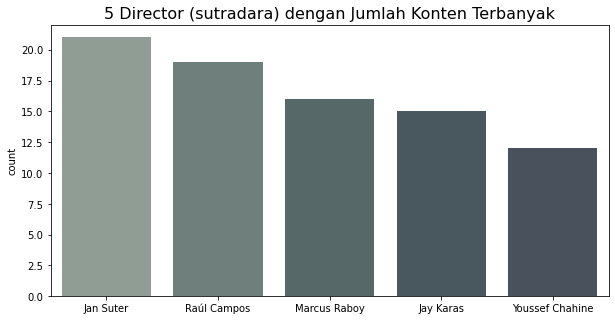

In [55]:
plt.figure(figsize=(10,5))
netflix_directors = netflix[netflix.director != 'director unavailable'].set_index('title').director.str.split(', ', 
                    expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(x = netflix_directors, order=netflix_directors.value_counts().index[:5], palette='crest', saturation=.2)
plt.title('5 Director (sutradara) dengan Jumlah Konten Terbanyak', fontsize=16)
plt.show()